In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from datetime import datetime
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model

2025-04-23 19:35:01.235385: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 19:35:01.292425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-23 19:35:01.292468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 19:35:01.294164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 19:35:01.304383: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 19:35:01.305946: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Fase 1 - Comprensión del negocio

En esta fase se identificarán los factores clave necesarios para abordar los objetivos empresariales y se plantearán en objetivos específicos de minería de datos, asegurando que el análisis posterior responda adecuadamente a las necesidades del negocio.

## Proyecto de Deep Learning - Dataset CIFAR-100

**Autores:** Daniel Iturra, Diego Velasquez, Jonathan Huala, Jorge Gonzales.

**Fecha:** 20-04-2025

## Contexto

En la actualidad, la clasificación automática de imágenes es una tarea fundamental en numerosos sectores, como la salud, la seguridad, el comercio y el entretenimiento. Contar con sistemas que reconozcan objetos en imágenes de forma rápida y precisa permite optimizar procesos, reducir errores humanos y tomar decisiones más informadas.

Este proyecto se enfoca en la clasificación de imágenes en 100 clases distintas, utilizando el dataset CIFAR-100. Cada imagen pertenece a una categoría como animales, vehículos, objetos del hogar, alimentos, entre otros. La capacidad de un modelo para identificar correctamente estas clases tiene múltiples aplicaciones prácticas, tales como el filtrado de contenido visual o reconocimiento de objetos en tiempo real.

# Fase 2 - Comprensión de los datos

Durante esta fase, se realizará una recolección y análisis preliminar de los datos disponibles, con el objetivo de comprender su naturaleza y calidad. Se identificarán patrones iniciales y posibles problemas que puedan afectar el análisis, lo que permitirá guiar el proceso de preparación de los datos.

## Exploraciones iniciales

Configuración de estilos para que las gráficas se van más limpias.

In [2]:
plt.style.use('ggplot')
sns.set()

Se cargan los datos de CIFAR-100 usando la función load_data() con label_mode='fine', lo cual significa que se usaron las 100 clases específicas del dataset.

Se cargan los datos del dataset CIFAR-100 el cual contiene 60.000 imágenes (32x32 píxeles, 3 canales de color), se asignan 50.000 imágenes para entrenamiento y 10.000 para la prueba.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Se revisan las dimensiones de los datos y las etiquetas.

In [4]:
print("Dimensiones del set de entrenamiento:", x_train.shape)
print("Dimensiones del set de prueba:", x_test.shape)

num_classes = len(np.unique(y_train))
print("Número de clases:", num_classes)

print("Primeras 10 etiquetas (y_train):", y_train[:10].ravel())
print("Etiquetas únicas:", np.unique(y_train))

Dimensiones del set de entrenamiento: (50000, 32, 32, 3)
Dimensiones del set de prueba: (10000, 32, 32, 3)
Número de clases: 100
Primeras 10 etiquetas (y_train): [19 29  0 11  1 86 90 28 23 31]
Etiquetas únicas: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Se define la lista de nombres humanos de las etiquetas, asociadas a cada número (del 0 al 99).

In [5]:
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

Se seleccionan 10 imágenes aleatorias y se muestran junto a su nombre.

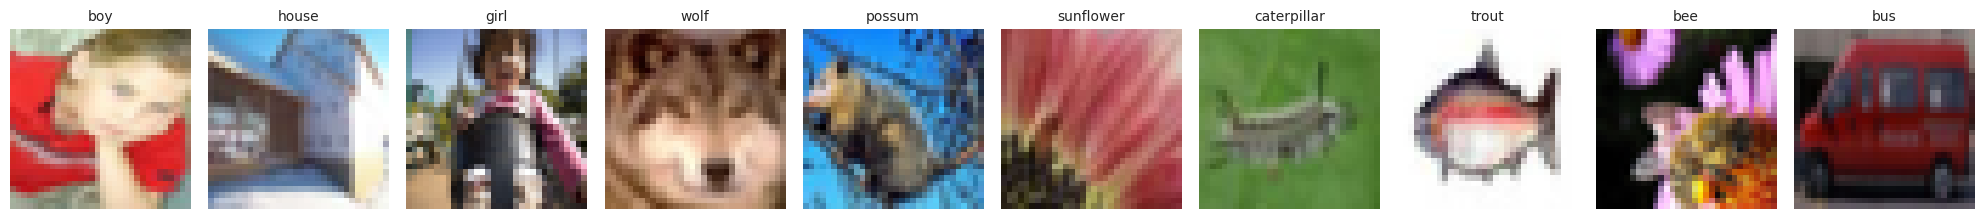

In [6]:
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    index = random.randint(0, len(x_train) - 1)
    axes[i].imshow(x_train[index])
    label = y_train[index][0]
    axes[i].set_title(fine_labels[label], fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Se cuentan cuántas imágenes hay por clase y se construyó un dataframe con esa información.

In [7]:
unique, counts = np.unique(y_train, return_counts=True)

df_counts = pd.DataFrame({
    'Label ID': unique,
    'Label Name': [fine_labels[i] for i in unique],
    'Count': counts
})

df_counts_sorted = df_counts.sort_values(by='Count', ascending=False)
df_counts_sorted.head()

,Label ID,Label Name,Count
0,0,apple,500
63,63,porcupine,500
73,73,shark,500
72,72,seal,500
71,71,sea,500


Se grafica un barplot de las clases más comunes.

/tmp/ipykernel_28/237555424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')


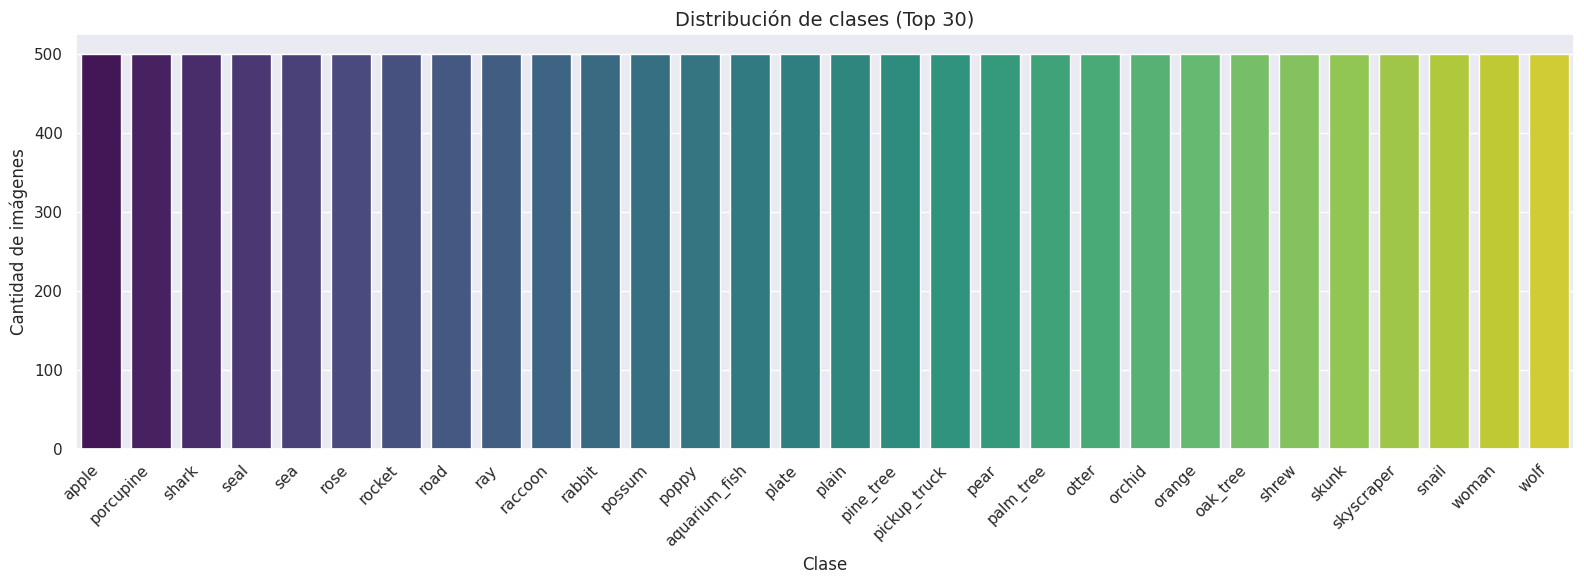

In [8]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')
plt.title('Distribución de clases (Top 30)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de imágenes')
plt.xlabel('Clase')
plt.tight_layout()
plt.show()

Se pasará a la preparación de los datos para ocuparlos en las redes neuronales para las clases [Preparación para modelo MLP] [Fase 3] 

# Fase 3 - Preparación de los datos

En esta fase se seleccionarán, limpiarán y transformarán los datos para que sean adecuados al modelado. Se abordarán problemas como valores faltantes, duplicados o inconsistencias, y se construirán nuevas variables cuando sea necesario, con el objetivo de obtener un conjunto de datos listo para aplicar las técnicas de modelado.

## Preparación para modelo MLP

Se hace la normalización de las imágenes, donde se transforman los valores de píxeles de 0–255 a 0–1

In [10]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

Con one-hot encoding de las etiquetas se convierten a vectores categóricos de tamaño 100, para que puedan ser interpretadas por la función de pérdida.

y_train_cat = to_categorical(y_train, 100)
y_test_cat  = to_categorical(y_test, 100)

Preparación del diccionario

In [34]:
def get_fine_labels():
    return [
        'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
        'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
        'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
        'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
        'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
        'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
        'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
        'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
        'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
        'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
        'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
        'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
        'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
        'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
        'worm'
    ]

fine_labels = get_fine_labels()

class_mapping = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'], 
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

fine_to_coarse = {}
coarse_labels = list(class_mapping.keys())

for coarse_idx, (coarse_name, fine_names) in enumerate(class_mapping.items()):
    for fine_name in fine_names:
        try:
            fine_idx = fine_labels.index(fine_name)
            fine_to_coarse[fine_idx] = coarse_idx
        except ValueError as e:
            print(f"Advertencia: No se encontró '{fine_name}' en fine_labels. Error: {e}")

# Verificación
print(f"\nMapeo creado para {len(fine_to_coarse)} de {len(fine_labels)} clases finas")
print("Ejemplo de mapeo:")
for i in range(5):
    fine_idx = list(fine_to_coarse.keys())[i]
    print(f"{fine_labels[fine_idx]} (índice {fine_idx}) -> {coarse_labels[fine_to_coarse[fine_idx]]}")


Mapeo creado para 100 de 100 clases finas
Ejemplo de mapeo:
beaver (índice 4) -> aquatic mammals
dolphin (índice 30) -> aquatic mammals
otter (índice 55) -> aquatic mammals
seal (índice 72) -> aquatic mammals
whale (índice 95) -> aquatic mammals


Se pasará al modelado [Modelado para modelo MLP] [Fase 4]

## Preparación para modelo CNN

Las imágenes son normalizadas (sus valores pasan de 0-255 a 0-1) para que la red neuronal pueda aprender de forma más eficiente.

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Las etiquetas se convierten a one-hot encoding para que la red pueda trabajar con ellas correctamente en la salida softmax.

In [4]:
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

Elimina aleatoriamente secciones rectangulares de las imágenes durante el entrenamiento.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def simple_cutout(image, size=8):
    """Versión simplificada de cutout para menor carga computacional"""
    h, w = image.shape[0], image.shape[1]
    
    # Centro aleatorio
    cx = np.random.randint(0, w)
    cy = np.random.randint(0, h)
    
    # Coordenadas del recorte
    x1 = max(0, cx - size//2)
    x2 = min(w, cx + size//2)
    y1 = max(0, cy - size//2)
    y2 = min(h, cy + size//2)
    
    # Aplicar máscara
    img_copy = image.copy()
    img_copy[y1:y2, x1:x2, :] = 0.0
    
    return img_copy

# Configurar el generador con menor transformación
datagen = ImageDataGenerator(
    preprocessing_function=simple_cutout,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Usar batch size mayor para acelerar el entrenamiento
batch_size = 128

# Generar los generadores
train_generator = datagen.flow(
    x_train, y_train_cat,
    batch_size=batch_size,
    subset='training'
)

val_generator = datagen.flow(
    x_train, y_train_cat,
    batch_size=batch_size,
    subset='validation'
)

Se pasa al modelado [Modelado para modelo CNN] [Fase 4]

# Fase 4 - Modelado

En esta fase se seleccionarán los algoritmos de modelado más adecuados y se entrenarán los modelos utilizando el conjunto de datos preparado. Se ajustarán los parámetros de los modelos y se evaluarán los resultados preliminares para determinar qué técnicas ofrecen el mejor desempeño para cumplir con los objetivos planteados.

## Modelado para modelo MLP

Se asignan los parámetros de entrenamiento

In [14]:
batch_size = 128
epochs = 150
validation_split = 0.2

Se asignan los parámetros del modelo MLP

Para la estructura del MLP se asignan:
* Número de capas ocultas.
* Número de neuronas por capa.
* Función de activación.
* Tasa de Dropout (para evitar sobreajuste).

La salida con softmax permitirá que la salida sea una distribución de probabilidad sobre las 100 clases.


In [15]:
input_shape   = (32, 32, 3)
hidden_layers = 4
hidden_units  = [2048, 1024, 512, 256]
activation    = 'relu'
dropout_rate  = 0.3
output_activation = 'softmax'

Se definine del modelo

Se define un modelo MLP funcional en Keras.

In [16]:
inputs = Input(shape=input_shape, name="input_layer")
x = Flatten(name="flatten_input")(inputs)
x = BatchNormalization(name="batchnorm_input")(x)

Se construyen las capas ocultas de forma iterativa

Las capas ocultas son densas y cada una va seguida de normalización batch y dropout.

In [17]:
for i in range(hidden_layers):
    x = Dense(hidden_units[i], activation=activation, name=f"dense_{i+1}")(x)
    x = BatchNormalization(name=f"batchnorm_{i+1}")(x)
    if dropout_rate > 0:
        x = Dropout(dropout_rate, name=f"dropout_{i+1}")(x)

Asignación de la capa de salida

La última capa tendrá 100 unidades y softmax, para clasificación multiclase.

In [18]:
outputs = Dense(100, activation=output_activation, name="output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"MLP_{hidden_layers}layers")

Se compila el modelo

Para la compilación del modelo
* Se usa el optimizador Adam.
* Se especifica la función de pérdida categorical_crossentropy.
* Se monitorea el accuracy como métrica principal.

In [19]:
optimizer = Adam(learning_rate=0.0008, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Se crean los callbacks para la detención automática y el guardado

Como callbacks tenemos:
* EarlyStopping, el cual detendrá el entrenamiento si no mejora su validación.
* ModelCheckpoint, el cual guarda el mejor modelo basado en la precisión de validación.
* TensorBoard, el cual permite visualizar las métricas y arquitectura del modelo gráficamente.

In [20]:
checkpoint_path = 'checkpoints/final_mlp_model.keras'
early_stopping  = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb  = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)
callbacks = [early_stopping, model_checkpoint, tensorboard_cb]

Entrenamiento del modelo

Se entrena el modelo con un máximo de 150 épocas, usando el 20% de los datos como validación, el entrenamiento puede terminar antes si no mejora durante 10 épocas por el EarlyStopping y se guarda el modelo con mejor val_accuracy con el ModelCheckpoint.


In [22]:
start_time = time.time()

history = model.fit(
    x_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/150
313/313 [==============================] - ETA: 0s - loss: 4.2884 - accuracy: 0.0742
Epoch 1: val_accuracy improved from -inf to 0.01020, saving model to checkpoints/final_mlp_model.keras


2025-04-23 19:47:32.544132: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1509949440 exceeds 10% of free system memory.
2025-04-23 19:47:37.055257: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 503316480 exceeds 10% of free system memory.


313/313 [==============================] - 35s 106ms/step - loss: 4.2884 - accuracy: 0.0742 - val_loss: 4.9092 - val_accuracy: 0.0102
Epoch 2/150
313/313 [==============================] - ETA: 0s - loss: 3.7607 - accuracy: 0.1299
Epoch 2: val_accuracy improved from 0.01020 to 0.13070, saving model to checkpoints/final_mlp_model.keras


2025-04-23 19:48:05.593516: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1509949440 exceeds 10% of free system memory.
2025-04-23 19:48:07.372064: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 503316480 exceeds 10% of free system memory.


313/313 [==============================] - 30s 95ms/step - loss: 3.7607 - accuracy: 0.1299 - val_loss: 3.7503 - val_accuracy: 0.1307
Epoch 3/150
313/313 [==============================] - ETA: 0s - loss: 3.5373 - accuracy: 0.1624
Epoch 3: val_accuracy improved from 0.13070 to 0.19470, saving model to checkpoints/final_mlp_model.keras


2025-04-23 19:48:34.512327: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1509949440 exceeds 10% of free system memory.


313/313 [==============================] - 29s 92ms/step - loss: 3.5373 - accuracy: 0.1624 - val_loss: 3.4019 - val_accuracy: 0.1947
Epoch 4/150
313/313 [==============================] - ETA: 0s - loss: 3.3860 - accuracy: 0.1878
Epoch 4: val_accuracy improved from 0.19470 to 0.20790, saving model to checkpoints/final_mlp_model.keras
313/313 [==============================] - 29s 92ms/step - loss: 3.3860 - accuracy: 0.1878 - val_loss: 3.2862 - val_accuracy: 0.2079
Epoch 5/150
313/313 [==============================] - ETA: 0s - loss: 3.2736 - accuracy: 0.2047
Epoch 5: val_accuracy improved from 0.20790 to 0.21640, saving model to checkpoints/final_mlp_model.keras
313/313 [==============================] - 28s 89ms/step - loss: 3.2736 - accuracy: 0.2047 - val_loss: 3.2432 - val_accuracy: 0.2164
Epoch 6/150
313/313 [==============================] - ETA: 0s - loss: 3.1863 - accuracy: 0.2238
Epoch 6: val_accuracy improved from 0.21640 to 0.23140, saving model to checkpoints/final_mlp_mode

Se pasa a la evaluación [Métricas de rendimiento del modelo MLP] [Fase 5]

## Modelado para modelo CNN

Construimos el modelo con mayor capacidad, usando bloques Inception mejorados y aumentando el número de filtros.

In [12]:
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

def efficient_block(x, filters, kernel_size=3, regularization=1e-4):
    """Bloque convolucional eficiente con BatchNorm"""
    # Primera capa convolucional
    x = layers.Conv2D(filters, kernel_size, padding='same', 
                      kernel_regularizer=regularizers.l2(regularization))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    
    # Segunda capa convolucional
    x = layers.Conv2D(filters, kernel_size, padding='same',
                      kernel_regularizer=regularizers.l2(regularization))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    
    return x

# Construir modelo optimizado
def build_efficient_model(input_shape=(32, 32, 3), num_classes=100):
    inputs = layers.Input(shape=input_shape)
    
    # Bloque 1
    x = efficient_block(inputs, 64)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.2)(x)
    
    # Bloque 2
    x = efficient_block(x, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.3)(x)
    
    # Bloque 3
    x = efficient_block(x, 256)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.4)(x)
    
    # Clasificación
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Crear el modelo
model = build_efficient_model()

# Mostrar resumen del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                            

Configuramos un optimizador Adam con una tasa de aprendizaje optimizada y compilamos el modelo con Label Smoothing.

In [13]:
checkpoint = ModelCheckpoint(
    'checkpoints/cnn_cifar100_efficient_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Usamos Adam para convergencia rápida
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilar con label smoothing
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

Se configura el earlyStopping, el cual detiene el entrenamiento cuando la validación no mejora en 5 épocas seguidas, luego se configura ReduceLROnPlateau, el cual reduce la tasa de aprendizaje si la validación se estanca.

In [14]:
# Early stopping más agresivo
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reducción de tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

Se entrena el modelo con aumento de datos en cada lote, se le coloca validación automática, se implementa el guardado del mejor checkpoint, se le coloca la detención temprana si no mejora el modelo y se ajusta automáticamente el learning rate.

In [17]:
# Entrenamos con menos épocas pero suficientes para ver mejoras
history = model.fit(
    train_generator,
    epochs=50,  # Menos épocas
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.4511 - accuracy: 0.0667
Epoch 1: val_accuracy improved from -inf to 0.03890, saving model to checkpoints/cnn_cifar100_efficient_best.h5


/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 278s 881ms/step - loss: 4.4511 - accuracy: 0.0667 - val_loss: 4.9652 - val_accuracy: 0.0389 - lr: 0.0010
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.9775 - accuracy: 0.1309
Epoch 2: val_accuracy improved from 0.03890 to 0.12000, saving model to checkpoints/cnn_cifar100_efficient_best.h5
313/313 [==============================] - 260s 829ms/step - loss: 3.9775 - accuracy: 0.1309 - val_loss: 4.0400 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.6700 - accuracy: 0.1953
Epoch 3: val_accuracy improved from 0.12000 to 0.20860, saving model to checkpoints/cnn_cifar100_efficient_best.h5
313/313 [==============================] - 253s 809ms/step - loss: 3.6700 - accuracy: 0.1953 - val_loss: 3.6180 - val_accuracy: 0.2086 - lr: 0.0010
Epoch 4/50
313/313 [==============================] - ETA: 0s - loss: 3.4612 - accuracy: 0.2453
Epoch 4: val_accuracy improved from 0.

# Fase 5 - Evaluación

En la fase de evaluación se analizará el rendimiento de los modelos desarrollados, comparándolos con los objetivos del negocio para asegurar que sean útiles y precisos. Se tomará en cuenta la validez de los resultados, se decidirá si es necesario ajustar los modelos o si están listos para su implementación.

## Métricas de rendimiento del modelo MLP

Se obtiene el tiempo el cual el modelo se estuvo entrenando.

In [24]:
print(f"\nTiempo total de entrenamiento: {(time.time()-start_time)/60:.2f} min")


Tiempo total de entrenamiento: 18.81 min


Se evalua la calidad final del modelo usando datos totalmente nuevos y no vistos durante el entrenamiento.

In [40]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model = load_model('checkpoints/final_mlp_model.keras')

# Ahora puedes evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"🔍 Test accuracy: {test_accuracy:.4f}")
print(f"📉 Test loss: {test_loss:.4f}")

313/313 [==============================] - 4s 9ms/step - loss: 3.0338 - accuracy: 0.2852
🔍 Test accuracy: 0.2852
📉 Test loss: 3.0338


Se grafican las curvas de precisión y pérdida para el entrenamiento y la validación del modelo.

Se grafican las curvas de pérdida y precisión de entrenamiento y validación, en donde se pueden identificar posibles problemas de sobreajuste o subajuste y las mejores épocas de rendimiento.


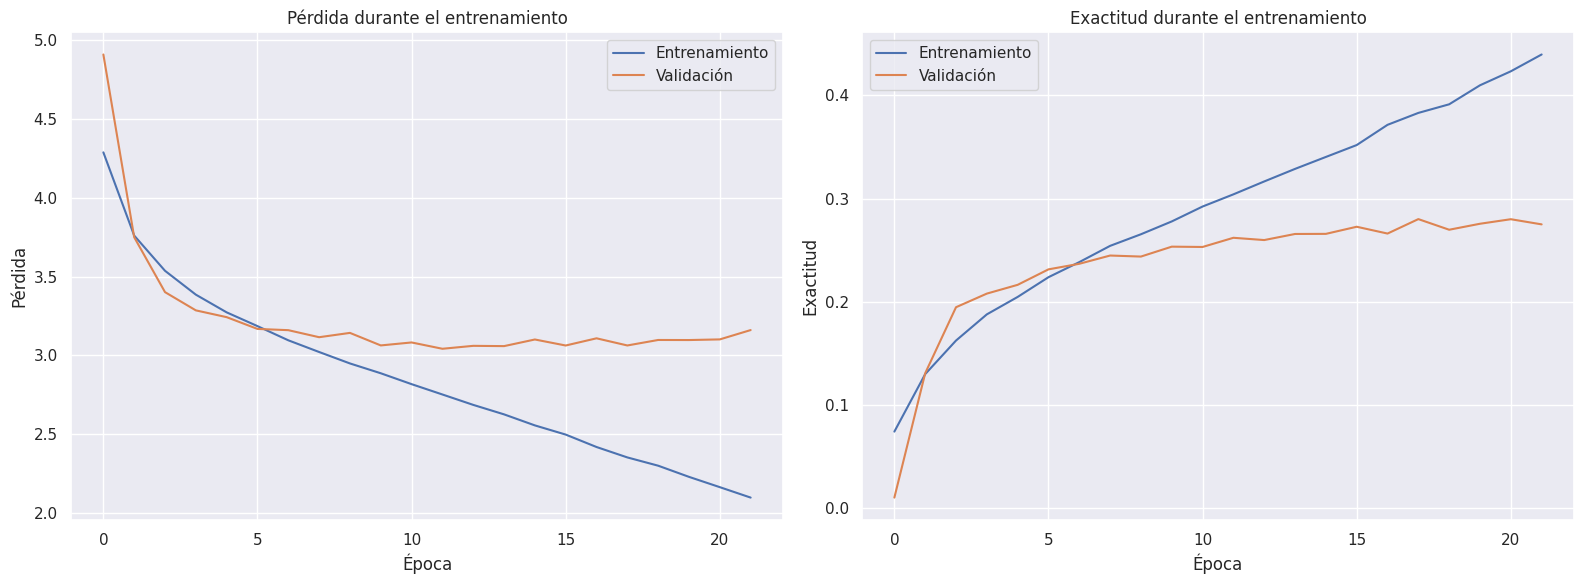

In [41]:
def plot_training_history(history):
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.plot(history.history['loss'], label='Entrenamiento')
    ax1.plot(history.history['val_loss'], label='Validación')
    ax1.set_title('Pérdida durante el entrenamiento')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Pérdida')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='Entrenamiento')
    ax2.plot(history.history['val_accuracy'], label='Validación')
    ax2.set_title('Exactitud durante el entrenamiento')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Exactitud')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
plot_training_history(history)

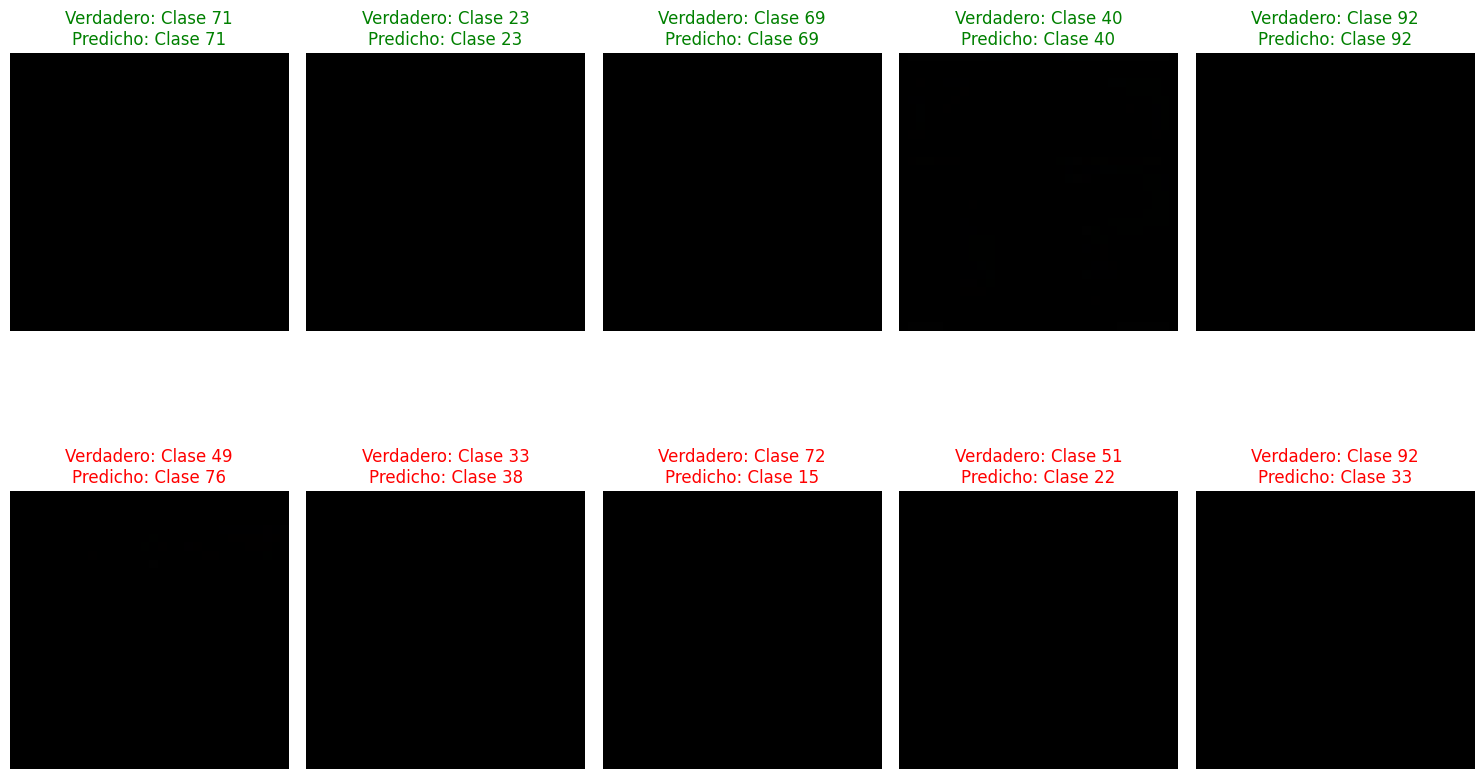

In [30]:
# 4. Visualización 1: Ejemplos de predicciones correctas e incorrectas
plt.figure(figsize=(15, 10))

# Nombres de clases CIFAR-100 (si no tienes estos, puedes usar índices)
# Esta es una lista simplificada, CIFAR-100 tiene 100 clases
class_names = [f"Clase {i}" for i in range(100)]  # Reemplaza con nombres reales si los tienes

# Obtener ejemplos de predicciones correctas
correct_idx = np.where(y_pred == y_true)[0]
# Obtener ejemplos de predicciones incorrectas
incorrect_idx = np.where(y_pred != y_true)[0]

# Mostrar 5 predicciones correctas
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"Verdadero: {class_names[y_true[idx]]}\nPredicho: {class_names[y_pred[idx]]}", color='green')
    plt.axis('off')

# Mostrar 5 predicciones incorrectas
for i, idx in enumerate(incorrect_idx[:5]):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"Verdadero: {class_names[y_true[idx]]}\nPredicho: {class_names[y_pred[idx]]}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.savefig('ejemplos_prediccion.png')
plt.show()

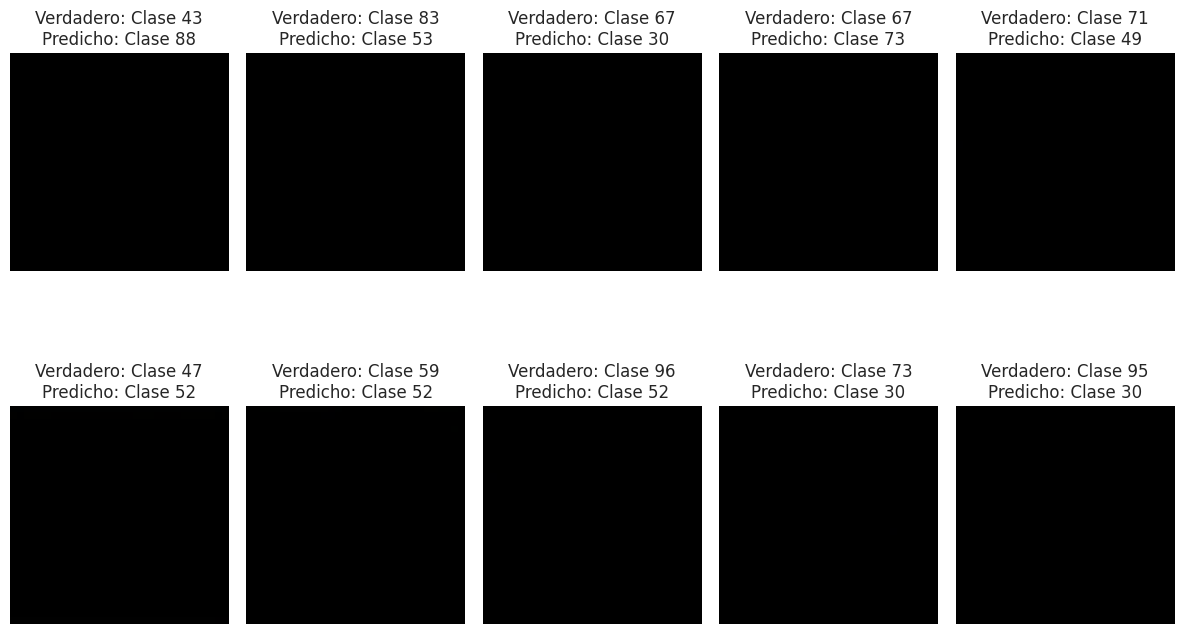

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
# 5. Visualización 2: Top-5 clases más confundidas
conf_mat = confusion_matrix(y_true, y_pred)
np.fill_diagonal(conf_mat, 0)  # Eliminar diagonal para enfocarse en errores
most_confused = np.dstack(np.unravel_index(np.argsort(conf_mat.ravel())[-10:], conf_mat.shape))[0]

plt.figure(figsize=(12, 8))
for i, (true_class, pred_class) in enumerate(most_confused):
    plt.subplot(2, 5, i+1)
    idx = np.where((y_true == true_class) & (y_pred == pred_class))[0][0]
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"Verdadero: {class_names[true_class]}\nPredicho: {class_names[pred_class]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('clases_confundidas.png')
plt.show()

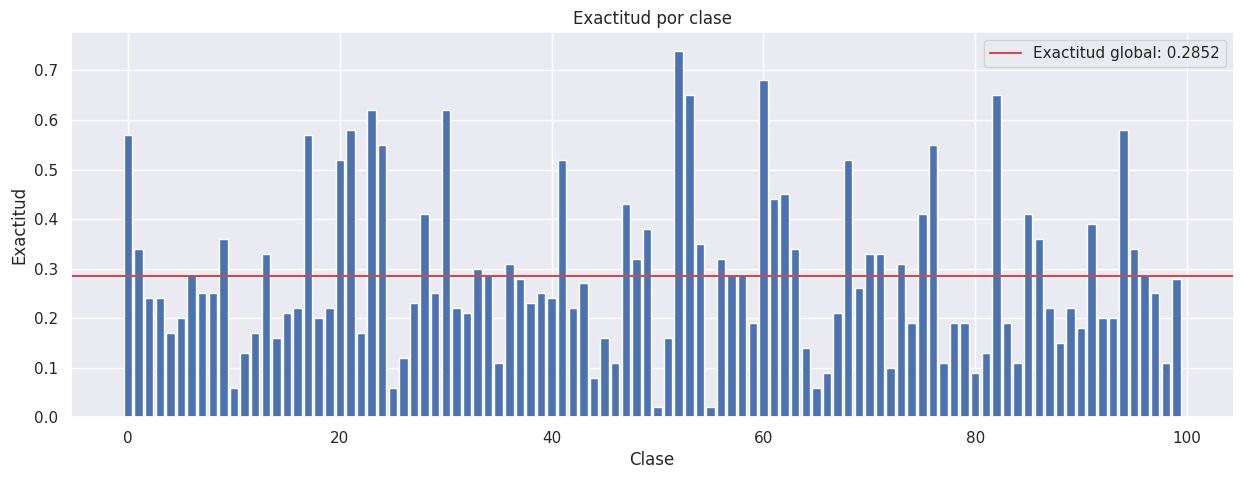

In [32]:
# 6. Visualización 3: Distribución de precisión por clase
class_accuracy = np.zeros(100)
for i in range(100):
    class_indices = np.where(y_true == i)[0]
    if len(class_indices) > 0:
        class_accuracy[i] = np.mean(y_pred[class_indices] == i)

plt.figure(figsize=(15, 5))
plt.bar(range(100), class_accuracy)
plt.xlabel('Clase')
plt.ylabel('Exactitud')
plt.title('Exactitud por clase')
plt.axhline(y=accuracy, color='r', linestyle='-', label=f'Exactitud global: {accuracy:.4f}')
plt.legend()
plt.savefig('precision_por_clase.png')
plt.show()

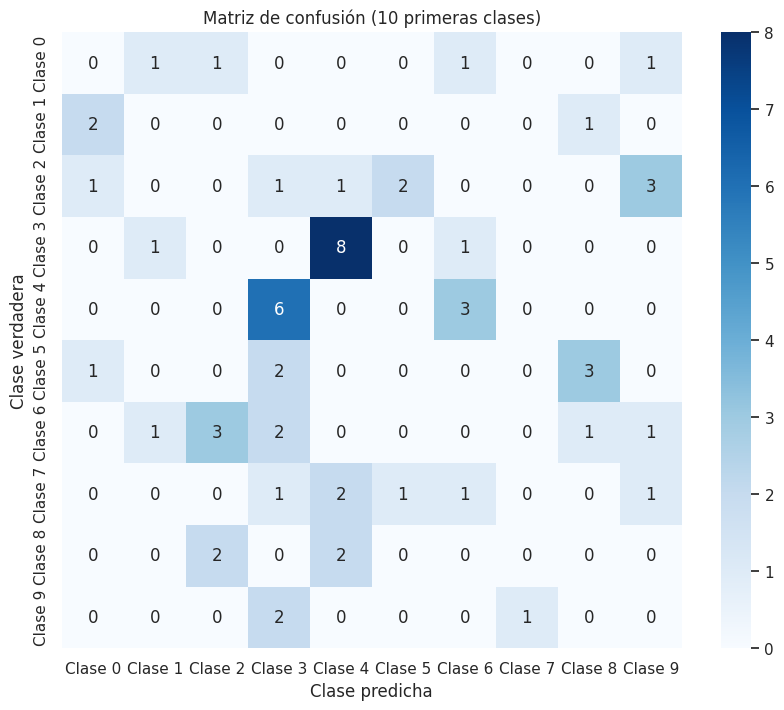

In [33]:
import seaborn as sns
# 7. Visualización 4: Matriz de confusión para las 10 primeras clases
plt.figure(figsize=(10, 8))
conf_mat_subset = conf_mat[:10, :10]  # Tomar solo las primeras 10 clases para legibilidad
sns.heatmap(conf_mat_subset, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names[:10], yticklabels=class_names[:10])
plt.xlabel('Clase predicha')
plt.ylabel('Clase verdadera')
plt.title('Matriz de confusión (10 primeras clases)')
plt.savefig('matriz_confusion.png')
plt.show()

Predicción de superclases y clases

1/1 [==============================] - 0s 34ms/step


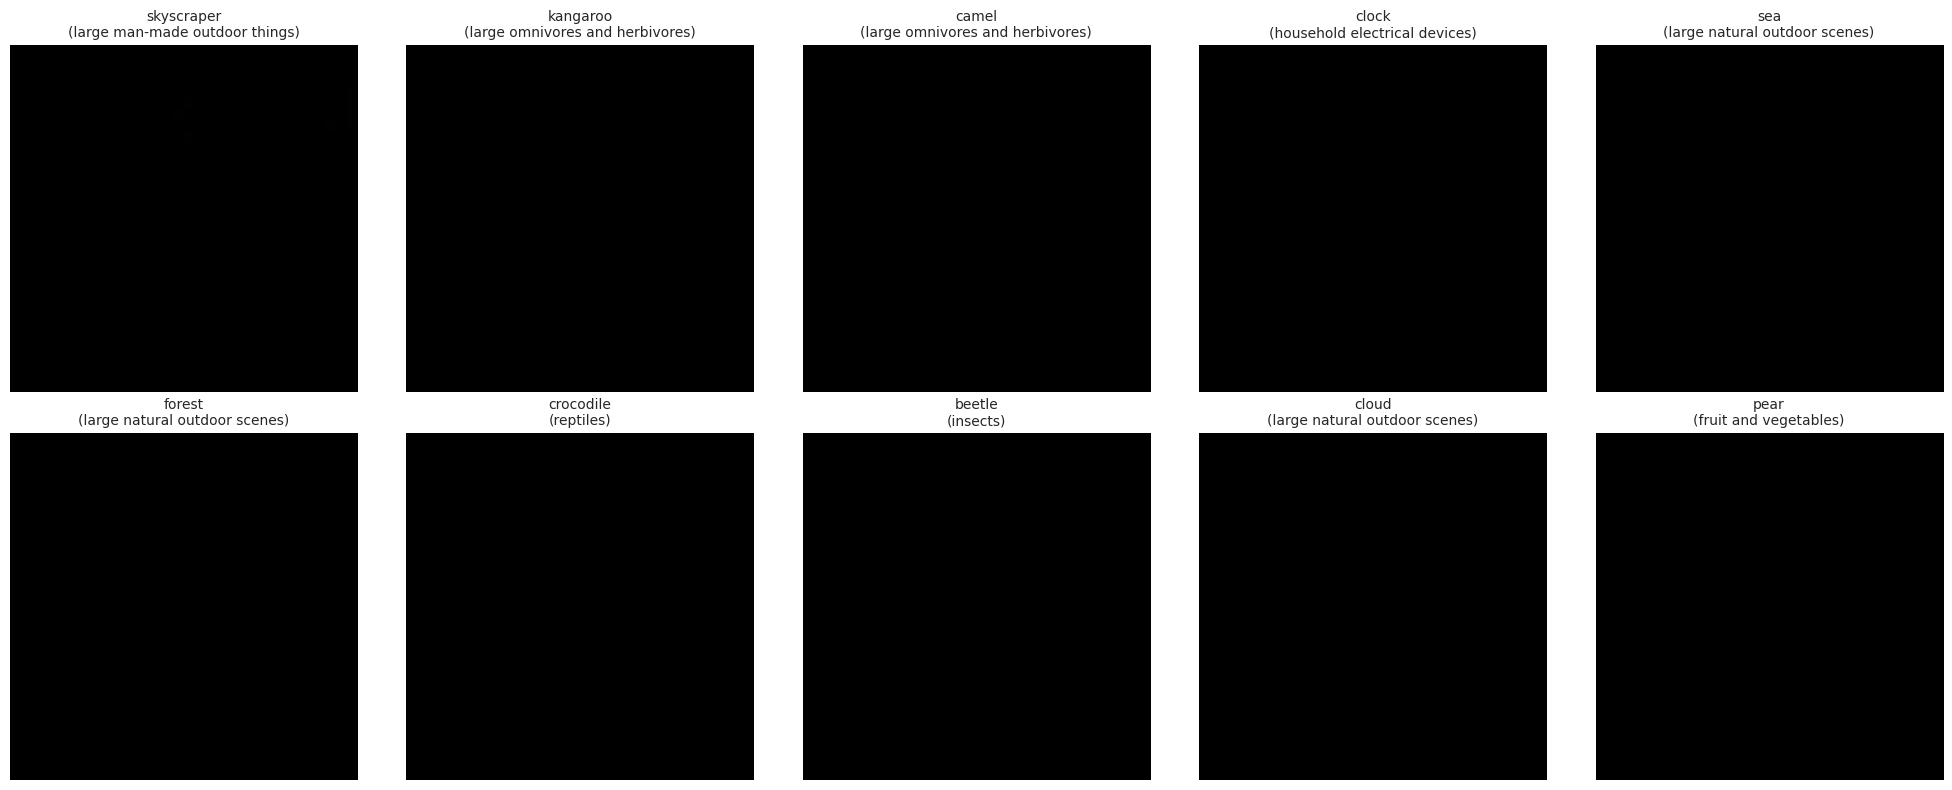

In [37]:
def predict_to_superclass(model, images):
    fine_probs = model.predict(images)
    fine_preds = np.argmax(fine_probs, axis=1)
    coarse_preds = [fine_to_coarse[pred] for pred in fine_preds]
    return coarse_preds, fine_preds

# Obtener predicciones
coarse_preds, fine_preds = predict_to_superclass(model, x_test[:10])

# Mostrar imágenes con predicciones
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.axis('off')

    fine_name = fine_labels[fine_preds[i]]
    coarse_name = list(class_mapping.keys())[coarse_preds[i]]

    plt.title(f"{fine_name}\n({coarse_name})", fontsize=10)

plt.tight_layout()
plt.show()

Se pasa a la preparación de datos [Preparación para modelo CNN] [Fase 3]